In [1]:
%%html
<style>
    .lightblue {
        font-family:sans-serif;
        background-color: #BDE0FE;
    }
    .blue {
        font-family:Georgia;
        background-color: #A2D2FF;
        color:white;
    }
</style>

 <center>
    <h1 class="blue"><br>
        Amazon Canada Products Visualizations<br>
    </h1>
</center>

In [2]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("E:/dataset/amz_ca_total_products_data_processed.csv")

In [4]:
df.head(5)

asin                                              title  \
0  B07CV4L6HX  Green Leaf WW3D Wonder Extension Cord Winder, ...   
1  B09N1HGY74  8pcs Toilet Seat Bumpers Universal Toilet Repl...   
2  B087P7538J  YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...   
3  B0822FF7YQ  LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...   
4  B08NTR8NN4  Lightbeam 16" Long Stem Deep Fry Thermometer w...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/81cRe0AVC4...   
1  https://m.media-amazon.com/images/I/512CpB-EP5...   
2  https://m.media-amazon.com/images/I/71P+qLFDFc...   
3  https://m.media-amazon.com/images/I/61wfWLZRn-...   
4  https://m.media-amazon.com/images/I/61qJG-y1He...   

                            productURL  stars  reviews  price  listPrice  \
0  https://www.amazon.ca/dp/B07CV4L6HX    4.4     2876  47.69       0.00   
1  https://www.amazon.ca/dp/B09N1HGY74    3.8       55  10.99       0.00   
2  https://www.amazon.ca/dp/B087P7538J    4.0      126  25.99      27.99   
3  https://www.amazon.ca/dp/B0822FF7YQ    4.5     1936  21.99      30.99   
4  https://www.amazon.ca/dp/B08NTR8NN4    4.2       46  18.99       0.00   

             categoryName  isBestSeller  boughtInLastMonth  
0  Industrial  Scientific         False                  0  
1  Industrial  Scientific         False                100  
2  Industrial  Scientific         False                 50  
3  Industrial  Scientific         False                100  
4  Industrial  Scientific         False                100

In [5]:
print(df.shape)

(2165926, 11)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165926 entries, 0 to 2165925
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 167.3+ MB


<center>
    <h3 class="lightblue"><br>
        Top 10 most popular products with their name, number of sales and ratings.<br>
    </h3>
</center>

In [7]:
top_10_titles = df.sort_values(by='boughtInLastMonth', ascending=False).head(10)

top_10_titles[['title', 'boughtInLastMonth', 'stars']]

title  boughtInLastMonth  \
1014818  Royale Velour Toilet Paper, 12 Equals 24 Rolls...              20000   
1565309  Creatine Monohydrate Powder 425g - Creatine Su...              20000   
685063   Bounty Select-A-Size Paper Towels, 8 Double Pl...              20000   
267603   Rael Miracle Invisible Spot Cover - Absorbing ...              10000   
1014819  Cottonelle Ultra Clean Toilet Paper, Strong To...              10000   
1447262  Amazon Basics 36 Pack AAA High-Performance Alk...              10000   
1014824  Charmin Ultra Soft Toilet Paper 24 Mega Rolls ...              10000   
267606   Sunstar 888JC GUM Advanced Care Flossers, Fres...              10000   
267605   Hair Wax Stick, Wax Stick for Hair Wigs Edge C...              10000   
685065   Royale Original 2 Ply Facial Tissue, Soft & St...              10000   

         stars  
1014818    4.5  
1565309    4.6  
685063     4.8  
267603     4.5  
1014819    4.7  
1447262    4.6  
1014824    4.7  
267606     4.7  
267605     4.1  
685065     4.7

<center>
    <h3 class="lightblue"><br>
        Top 10 most popular products bought last month<br>
    </h3>
</center>

In [8]:
top_10_data = df.nlargest(10, 'boughtInLastMonth')[['imgUrl', 'title', 'boughtInLastMonth', 'price']]

for _, row in top_10_data.iterrows():
    imgUrl = row['imgUrl']
    title = row['title']
    bought_in_last_month = row['boughtInLastMonth']
    price = row['price']
    
    display(HTML(f'<p>{title} ({bought_in_last_month} sold, price: {int(price)})</p><img src="{imgUrl}">'))

<center>
    <h3 class="lightblue"><br>
        Finding distribution of star ratings.<br>
    </h3>
</center>

C:\Users\urvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


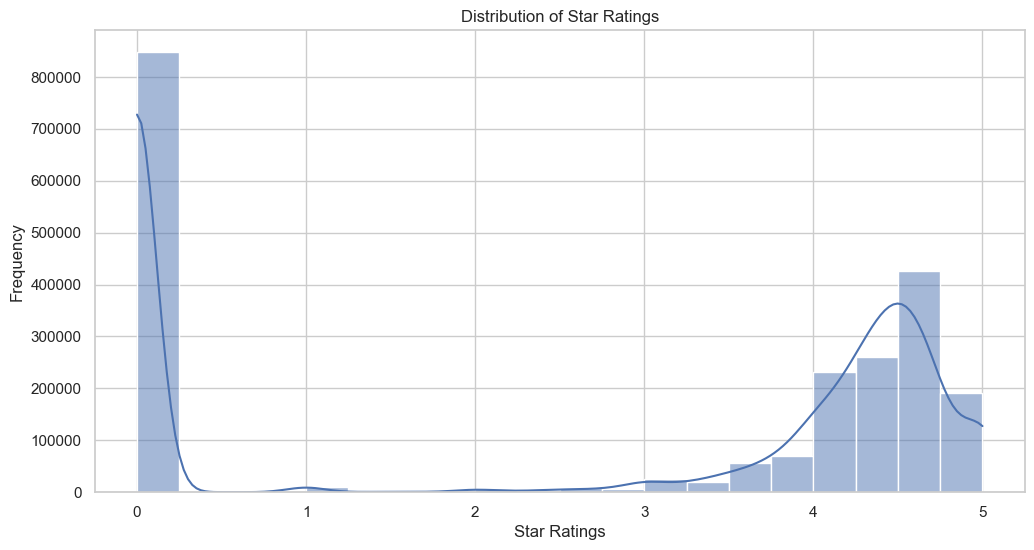

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='stars', bins=20, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.show()

<center>
    <h3 class="lightblue"><br>
        How does the number of reviews vary with star ratings?<br>
    </h3>
</center>

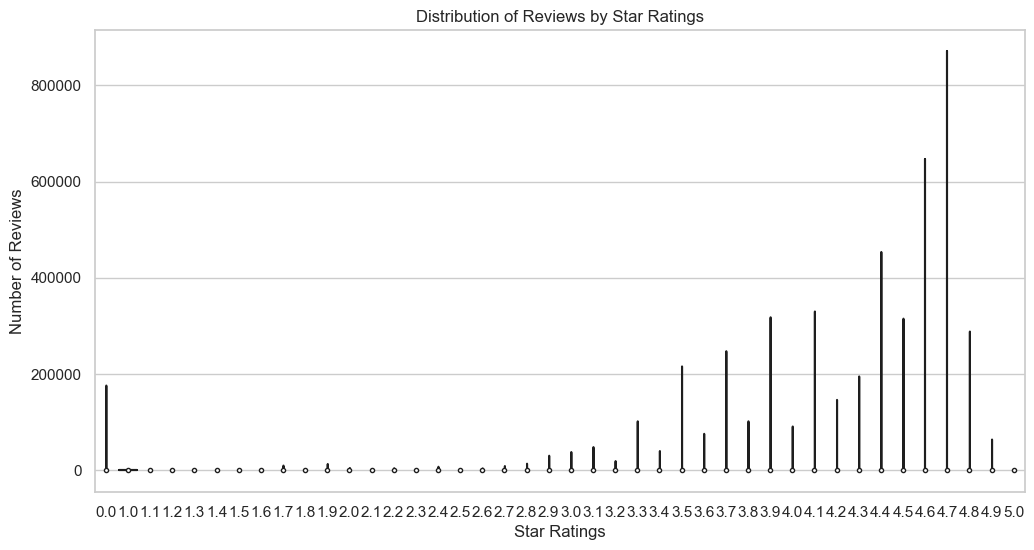

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='stars', y='reviews', palette='viridis')
plt.title('Distribution of Reviews by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
df['price'].value_counts()

price
0.00       177910
19.99       31937
29.99       22241
16.99       19631
14.99       19501
            ...  
3588.00         1
3256.78         1
1875.12         1
392.54          1
892.40          1
Name: count, Length: 81373, dtype: int64

<center>
    <h3 class="lightblue"><br>
        To look at price distribution, we will first need to remove products with 0 price.<br>
    </h3>
</center>

In [12]:
df = df[df['price'] != 0]

In [13]:
df['price'].value_counts()

price
19.99     31937
29.99     22241
16.99     19631
14.99     19501
15.99     18032
          ...  
628.85        1
240.51        1
447.75        1
201.52        1
892.40        1
Name: count, Length: 81372, dtype: int64

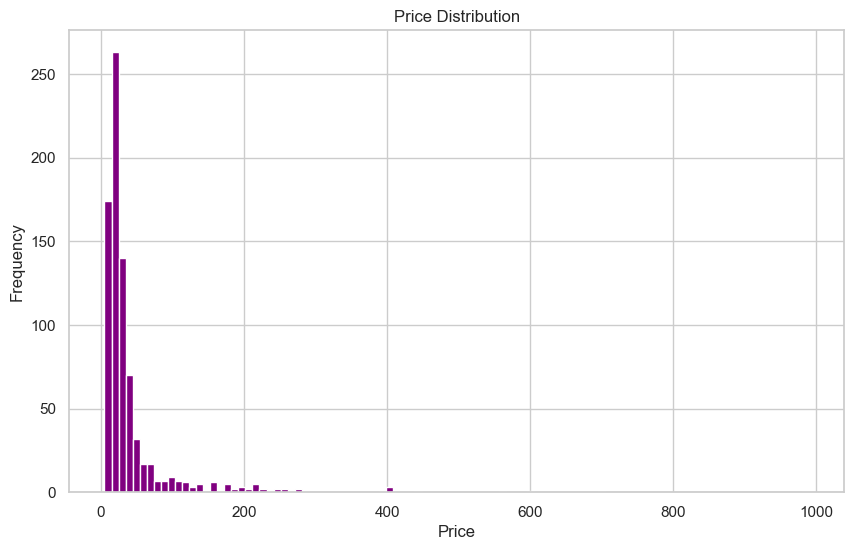

In [14]:
price_data = df['price'].head(800)


plt.figure(figsize=(10, 6))  
plt.hist(price_data, bins=100, color='purple', edgecolor='white')  

plt.title('Price Distribution')  
plt.xlabel('Price') 
plt.ylabel('Frequency') 

plt.grid(True)  
plt.show() 

<center>
    <h3 class="lightblue"><br>
        Top 5 products with highest ratings.<br>
    </h3>
</center>

In [15]:
top_5_products = df.nlargest(5, 'stars')

top_5_products[['title', 'boughtInLastMonth', 'stars']]

title  boughtInLastMonth  \
58   ERNETTE 40PCS LED Foam Sticks - Glow Sticks - ...                  0   
72   Medicom AssureTouch Agile Nitrile Gloves with ...                  0   
214             Men's Designer Fragrance Samples (9ct)                 50   
225  Door Spring Stopper, 12 Piece Stainless Steel ...                  0   
235  Penlight for Nurses Pen Torch Light Reusable L...                 50   

     stars  
58     5.0  
72     5.0  
214    5.0  
225    5.0  
235    5.0

In [16]:
df['discountPercentage'] = ((df['listPrice'] - df['price']) / df['listPrice']) * 100
df['discountPercentage'] = df['discountPercentage'].round(0)
df['discountPercentage'].value_counts()
df = df[df['discountPercentage'] > 0]
df['discountPercentage'].value_counts()

discountPercentage
6.0     11117
5.0     10875
7.0     10570
8.0     10212
10.0     9263
        ...  
98.0        1
94.0        1
96.0        1
95.0        1
99.0        1
Name: count, Length: 100, dtype: int64

<center>
    <h3 class="lightblue"><br>
        Top 5 products with highest discount.<br>
    </h3>
</center>

In [17]:
top_5_prod = df.nlargest(5, 'discountPercentage')

top_5_prod[['title', 'boughtInLastMonth','price','discountPercentage']]

title  boughtInLastMonth  \
1680513  Nippleless Covers, Breast Lift Tape, Silicone ...                100   
1812364  Silicone Cock Rings for Men Sex - Penis Rings ...                  0   
1860824                        Men Swim Bikini Briefs（FBA）                  0   
1022341  XY3G-Restraints Kit Multi-functional Anti-Stat...                  0   
1810485  Silicone Cock Rings for Men Sex -Sex Toys for ...                  0   

         price  discountPercentage  
1680513   0.01               100.0  
1812364   0.01               100.0  
1860824   0.27                99.0  
1022341   0.21                98.0  
1810485   0.60                97.0

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df['isBestSeller'] = df['isBestSeller'].astype(int)

In [20]:
df.head(5)

asin                                              title  \
2   B087P7538J  YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...   
3   B0822FF7YQ  LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...   
9   B07KMT96S2  Knife Sharpening Stone,400/1000.2000/5000 Doub...   
13  B08R8T657H  MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...   
18  B088M3JCP2  Heat Insulation Silicone Repair Mat with Scale...   

                                               imgUrl  \
2   https://m.media-amazon.com/images/I/71P+qLFDFc...   
3   https://m.media-amazon.com/images/I/61wfWLZRn-...   
9   https://m.media-amazon.com/images/I/61uWVjhezJ...   
13  https://m.media-amazon.com/images/I/6154LErNL3...   
18  https://m.media-amazon.com/images/I/61nzkHmJSZ...   

                             productURL  stars  reviews  price  listPrice  \
2   https://www.amazon.ca/dp/B087P7538J    4.0      126  25.99      27.99   
3   https://www.amazon.ca/dp/B0822FF7YQ    4.5     1936  21.99      30.99   
9   https://www.amazon.ca/dp/B07KMT96S2    4.4      366  29.99      35.99   
13  https://www.amazon.ca/dp/B08R8T657H    4.4       82  19.97      21.97   
18  https://www.amazon.ca/dp/B088M3JCP2    4.7      142  21.99      25.99   

              categoryName  isBestSeller  boughtInLastMonth  \
2   Industrial  Scientific             0                 50   
3   Industrial  Scientific             0                100   
9   Industrial  Scientific             0                 50   
13  Industrial  Scientific             0                  0   
18  Industrial  Scientific             0                 50   

    discountPercentage  
2                  7.0  
3                 29.0  
9                 17.0  
13                 9.0  
18                15.0

In [21]:
is_bestseller_count = df['isBestSeller'].value_counts()
is_bestseller_count

isBestSeller
0    164417
1      2162
Name: count, dtype: int64

<center>
    <h3 class="lightblue"><br>
        Bestseller Percentage<br>
    </h3>
</center>

In [22]:
is_bestseller_data = pd.DataFrame({'isBestSeller': is_bestseller_count.index, 'Count': is_bestseller_count.values})

custom_labels = {0: "Not Bestseller", 1: "Bestseller"}

is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(custom_labels)

fig = px.pie(is_bestseller_data, names='isBestSeller', values='Count', title='isBestSeller Count')

fig.show()

<center>
    <h3 class="lightblue"><br>
        Bestsellers bought in last month<br>
    </h3>
</center>

In [23]:
sum_bought_in_last_month = df.groupby('isBestSeller')['boughtInLastMonth'].sum()

custom_labels = {0: "Non-Bestseller Volume", 1: "Bestseller Volume"}

fig = px.pie(
    values=sum_bought_in_last_month,
    names=[custom_labels[i] for i in sum_bought_in_last_month.index],
    title='Sum of boughtInLastMonth by isBestSeller',
    labels={'names': 'isBestSeller', 'values': 'Sum'}
)

fig.show()

<center>
    <h3 class="lightblue"><br>
        Top 10 Categories by Sales<br>
    </h3>
</center>

In [24]:
category_sales = df.groupby('categoryName')['boughtInLastMonth'].sum().reset_index()

category_sales = category_sales.sort_values(by='boughtInLastMonth', ascending=False)

top_10_category_sales = category_sales.nlargest(10, 'boughtInLastMonth')

fig = px.bar(top_10_category_sales, x='categoryName', y='boughtInLastMonth',
             labels={'categoryName': 'Category', 'boughtInLastMonth': 'Total Sales (in Last Month)'},
             text='boughtInLastMonth', title='Top 10 Product Categories by Sales', color="categoryName",
            )

fig.update_traces(texttemplate='%{text}', textposition='outside') 

fig.update_layout(width=900, height=600) 

fig.update_xaxes(tickangle=-30)

fig.show()

<center>
    <h3 class="lightblue"><br>
        Top 10 Categories by Money Volume<br>
    </h3>
</center>

In [25]:
df['moneyVolume'] = df['price'] * df['boughtInLastMonth']

category_money_volume = df.groupby('categoryName')['moneyVolume'].sum().reset_index()

top_10_categories_by_money_volume = category_money_volume.nlargest(10, 'moneyVolume')

fig = px.bar(top_10_categories_by_money_volume, x='categoryName', y='moneyVolume',
             labels={'categoryName': 'Category', 'moneyVolume': 'Money Volume (CAD)'},
             text='moneyVolume', title='Top 10 Categories by Money Volume', color="categoryName"
            )

fig.update_traces(texttemplate='%{text}', textposition='outside') 

fig.update_layout(width=900, height=600)  

fig.update_xaxes(tickangle=-30) 

fig.show()

<center>
    <h3 class="lightblue"><br>
        Total Money Volume for the entire dataset<br>
    </h3>
</center>

In [26]:
total_money_volume = (df['price'] * df['boughtInLastMonth']).sum()
formatted_total_money_volume = f"CAD{total_money_volume:,.2f}"

print(f"Total Money Volume for the Entire Dataset: {formatted_total_money_volume}")

Total Money Volume for the Entire Dataset: CAD164,358,544.50


<center>
    <h3 class="lightblue"><br>
        Top 10 products bought in last month across all categories<br>
    </h3>
</center>

In [27]:
top_10_products_bought_in_last_month = df.nlargest(10, 'boughtInLastMonth')

fig = px.bar(top_10_products_bought_in_last_month, x='categoryName', y='boughtInLastMonth',
             title='Top 10 Products by Bought in Last Month',
             labels={'title': 'Product Title', 'boughtInLastMonth': 'Bought in Last Month'},
             text='boughtInLastMonth', color="title",
             hover_data=["stars", "reviews", "price", "isBestSeller"]
            )

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(width=2000, height=600)

fig.update_xaxes(tickangle=-30) 

fig.show()

<center>
    <h3 class="lightblue"><br>
        Number of Products in each Category<br>
    </h3>
</center>

In [28]:
category_counts = df['categoryName'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig = px.pie(category_counts.head(10), names='Category', values='Count', title='Number of Products in Each Category')
fig.show()

<center>
    <h3 class="lightblue"><br>
        Distribution of Star Ratings<br>
    </h3>
</center>

In [29]:
df_filtered = df[df['reviews'] > 0]

star_counts = df_filtered['stars'].value_counts().sort_index().reset_index()
star_counts.columns = ['Stars', 'Count']

fig = px.bar(star_counts, x='Stars', y='Count', text='Count',
             title='Distribution of Star Ratings (Excluding Products with 0 Reviews)',
             labels={'Stars': 'Star Rating', 'Count': 'Count'},
            color='Stars',
            )

fig.update_traces(texttemplate='%{text}', textposition='outside') 
fig.update_xaxes(type='category')

fig.show()

<center>
    <h3 class="lightblue"><br>
        Visualzize the word count of product category<br>
    </h3>
</center>

In [30]:
from wordcloud import WordCloud

In [31]:
df.categoryName

2                   Industrial  Scientific
3                   Industrial  Scientific
9                   Industrial  Scientific
13                  Industrial  Scientific
18                  Industrial  Scientific
                        ...               
2159330    Play Sets  Playground Equipment
2159420    Play Sets  Playground Equipment
2159436    Play Sets  Playground Equipment
2159454    Play Sets  Playground Equipment
2159501    Play Sets  Playground Equipment
Name: categoryName, Length: 166579, dtype: object

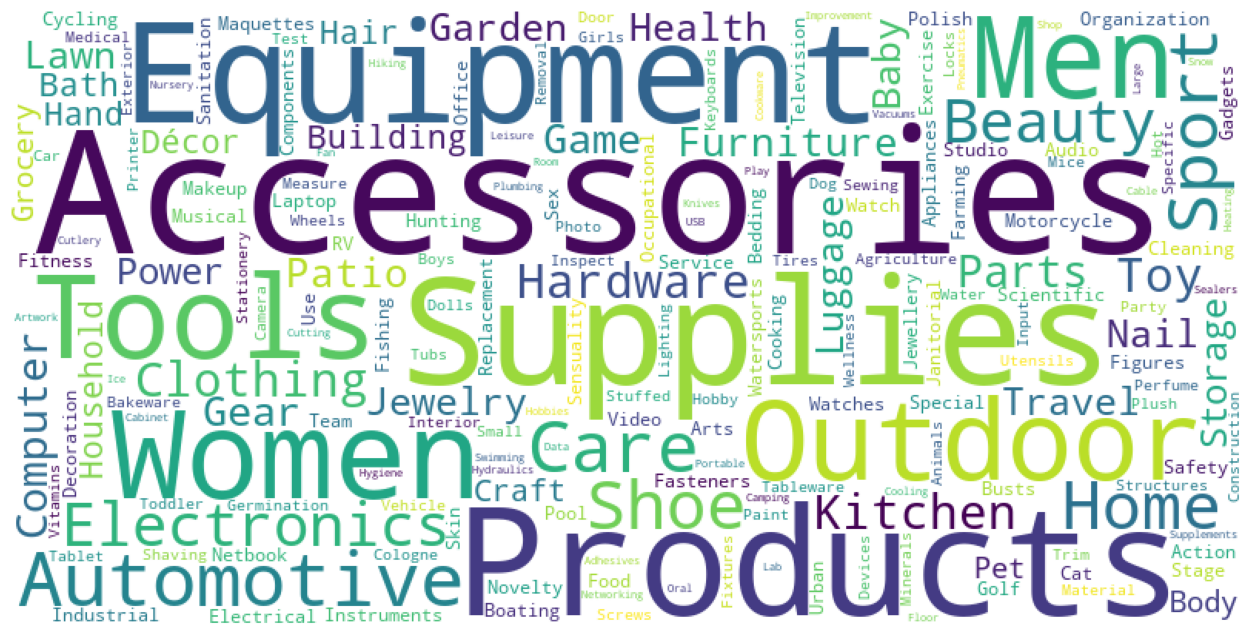

In [32]:
words = ' '.join((job for job in df.categoryName.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);